<a href="https://colab.research.google.com/github/Shubham-Patel22/Wine-Segmentation/blob/main/Wine_Segments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
wine = load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [3]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

In [4]:
wine_df.shape

(178, 13)

In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
wine_df.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [7]:
wine_df.duplicated().sum()

np.int64(0)

In [8]:
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: xlabel='alcohol'>

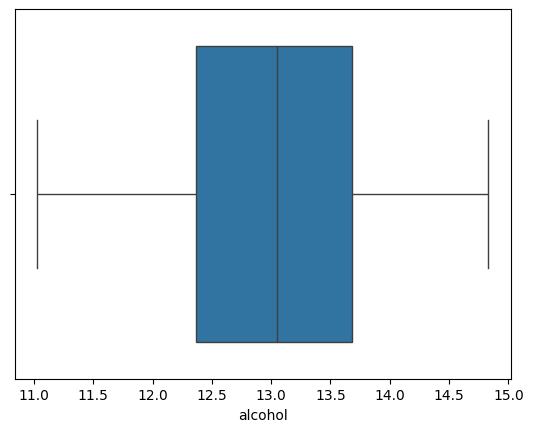

In [9]:
sns.boxplot(x = wine_df['alcohol'])

<Axes: xlabel='malic_acid'>

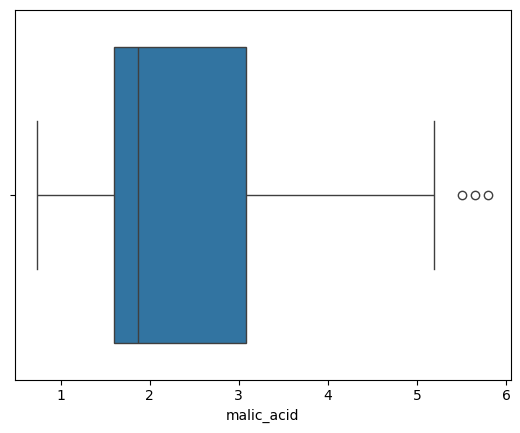

In [10]:
sns.boxplot(x = wine_df['malic_acid'])

<Axes: xlabel='ash'>

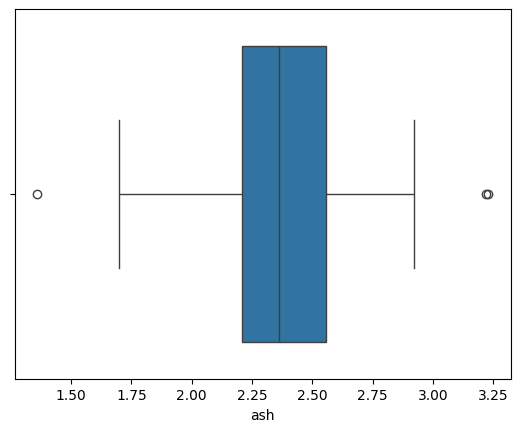

In [11]:
sns.boxplot(x = wine_df['ash'])

<Axes: xlabel='alcalinity_of_ash'>

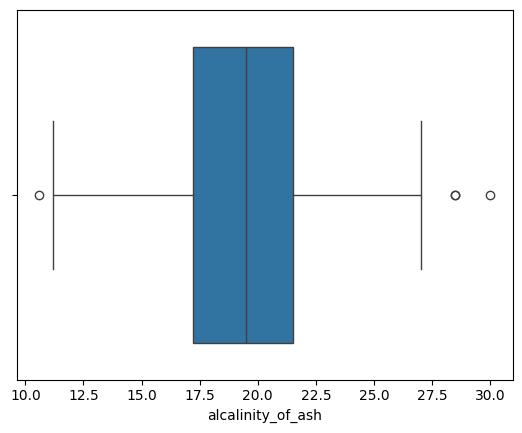

In [12]:
sns.boxplot(x = wine_df['alcalinity_of_ash'])

<Axes: xlabel='magnesium'>

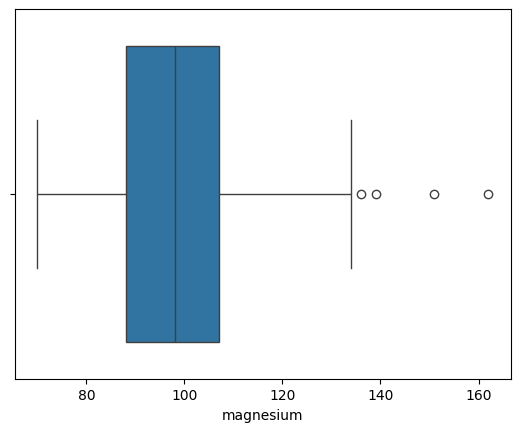

In [13]:
sns.boxplot(x = wine_df['magnesium'])

<Axes: xlabel='total_phenols'>

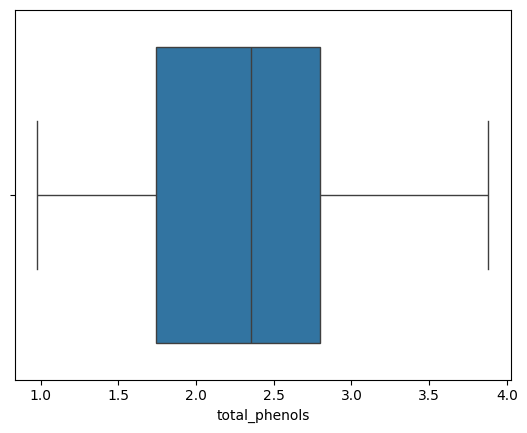

In [14]:
sns.boxplot(x = wine_df['total_phenols'])

<Axes: xlabel='flavanoids'>

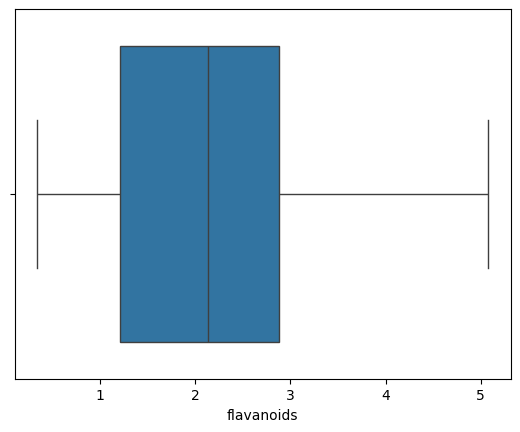

In [15]:
sns.boxplot(x = wine_df['flavanoids'])

<Axes: xlabel='nonflavanoid_phenols'>

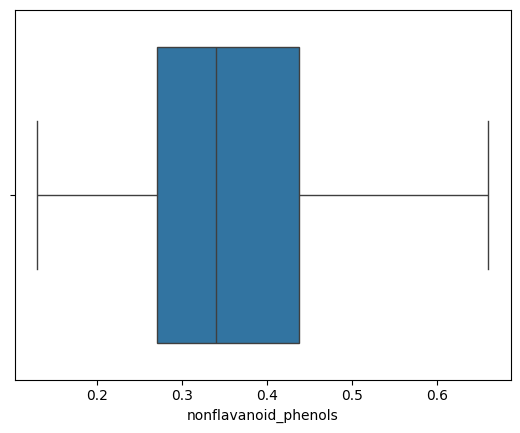

In [16]:
sns.boxplot(x = wine_df['nonflavanoid_phenols'])

<Axes: xlabel='proanthocyanins'>

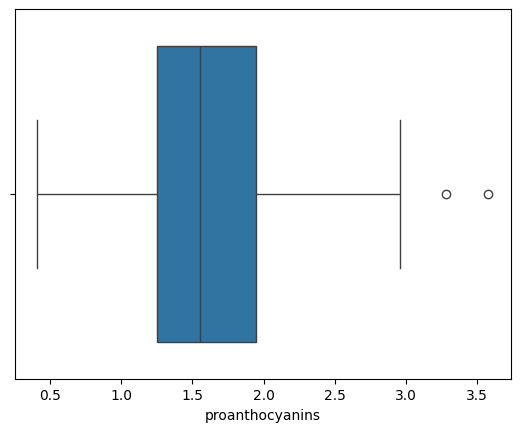

In [17]:
sns.boxplot(x = wine_df['proanthocyanins'])

<Axes: xlabel='color_intensity'>

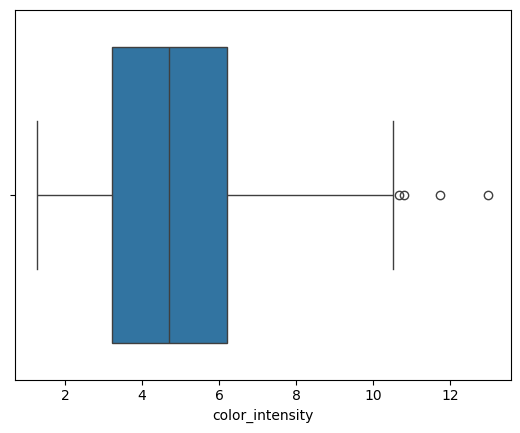

In [18]:
sns.boxplot(x = wine_df['color_intensity'])

<Axes: xlabel='hue'>

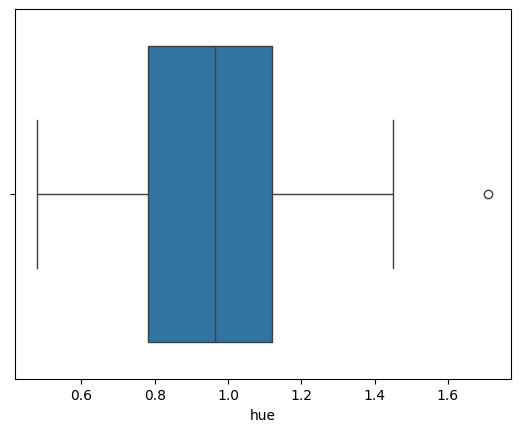

In [19]:
sns.boxplot(x = wine_df['hue'])

<Axes: xlabel='od280/od315_of_diluted_wines'>

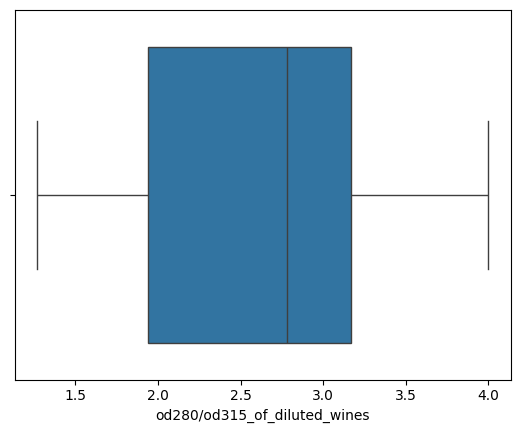

In [20]:
sns.boxplot(x = wine_df['od280/od315_of_diluted_wines'])

<Axes: xlabel='proline'>

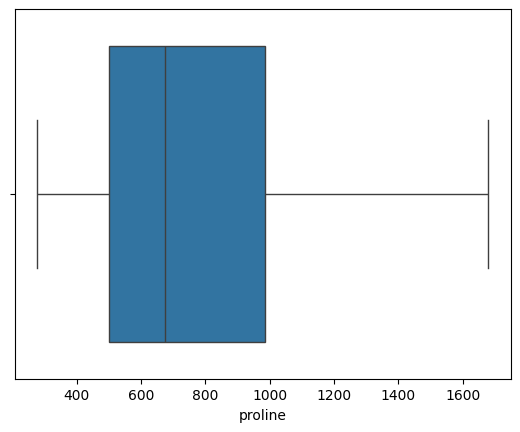

In [21]:
sns.boxplot(x = wine_df['proline'])

In [22]:
corr = wine_df.corr()
corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<Axes: >

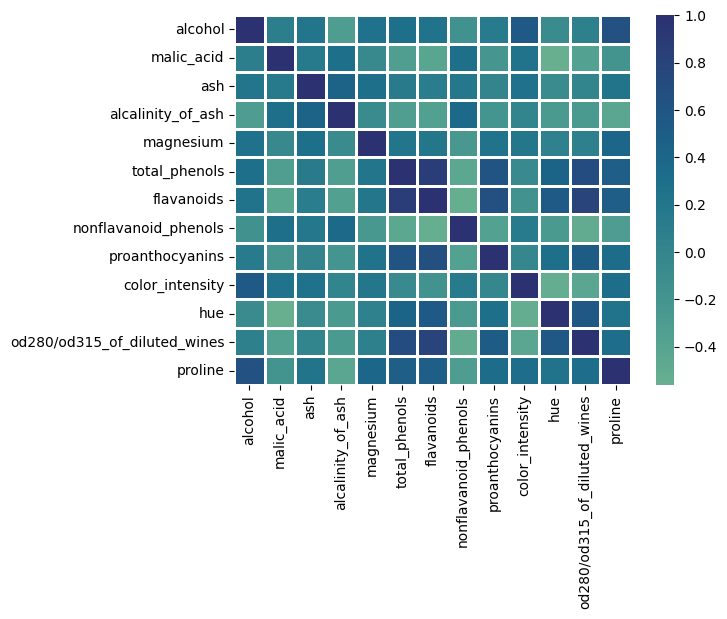

In [23]:
sns.heatmap(corr, center=0.0, linewidth=1.0, cmap="crest")

In [24]:
scaler = StandardScaler()

wine_scaled = pd.DataFrame(scaler.fit_transform(wine_df), columns = wine.feature_names)
wine_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [25]:
# Do PCA
pca = PCA()
wine_pca = pca.fit_transform(wine_scaled)

component_names = [f'PC{i+1}' for i in range(len(wine_df.columns))]
wine_pca_df = pd.DataFrame(data = wine_pca, columns = component_names)
wine_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364


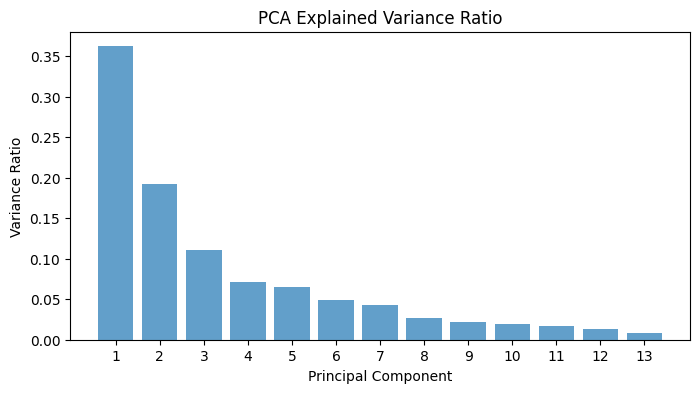

In [26]:
# Explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Plotting the explained variance
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Variance Ratio')
plt.xlabel('Principal Component')
plt.title('PCA Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [27]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=wine_df.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
alcohol,0.144329,0.483652,-0.207383,-0.017856,-0.265664,0.213539,-0.056396,0.396139,-0.508619,0.211605,-0.225917,-0.266286,0.014970
malic_acid,-0.245188,0.224931,0.089013,0.536890,0.035214,0.536814,0.420524,0.065827,0.075283,-0.309080,0.076486,0.121696,0.025964
ash,-0.002051,0.316069,0.626224,-0.214176,-0.143025,0.154475,-0.149171,-0.170260,0.307694,-0.027125,-0.498691,-0.049622,-0.141218
alcalinity_of_ash,-0.239320,-0.010591,0.612080,0.060859,0.066103,-0.100825,-0.286969,0.427970,-0.200449,0.052799,0.479314,-0.055743,0.091683
magnesium,0.141992,0.299634,0.130757,-0.351797,0.727049,0.038144,0.322883,-0.156361,-0.271403,0.067870,0.071289,0.062220,0.056774
total_phenols,0.394661,0.065040,0.146179,0.198068,-0.149318,-0.084122,-0.027925,-0.405934,-0.286035,-0.320131,0.304341,-0.303882,-0.463908
flavanoids,0.422934,-0.003360,0.150682,0.152295,-0.109026,-0.018920,-0.060685,-0.187245,-0.049578,-0.163151,-0.025694,-0.042899,0.832257
nonflavanoid_phenols,-0.298533,0.028779,0.170368,-0.203301,-0.500703,-0.258594,0.595447,-0.233285,-0.195501,0.215535,0.116896,0.042352,0.114040
proanthocyanins,0.313429,0.039302,0.149454,0.399057,0.136860,-0.533795,0.372139,0.368227,0.209145,0.134184,-0.237363,-0.095553,-0.116917
color_intensity,-0.088617,0.529996,-0.137306,0.065926,-0.076437,-0.418644,-0.227712,-0.033797,-0.056218,-0.290775,0.031839,0.604222,-0.011993


I feel that the number of features is a bit more. So, I will be selecting the features for clustering. Some features I will be eliminating. I will be removing 'flavonoids', 'nonflavonid_phenols' and 'proanthcyanins', since all are phenolic compounds are accounted for in 'total_phenols'. From the domain knowlegde, the features that should be kept are 'alcohol' for kick, 'malic_acid' for tart, 'total_phenols' for complexity & 'proline' for savouryness. 'color_intensity' gives how light or dark the color of wine is. 'hue' gives the colour(how red, green, yellow or blue, etc). 'magnesium' will be omitted since, it doesn't contribute to flavour. 'od280/od315_of_diluted_wines' is important because it is a spectrophotometric measurement used in oenology (wine science) to assess the phenolic composition of wine. 'ash' is important because it is an indicator of inorganic content. 'alcalinity_of_ash' is important because it measures pH of ash(inorganic) content and I want to see whether it has an impact. Wine is acidic because of alcohols which are soft acids and other soft organic acids like malic acid, tartaric acid, lactic acid, etc. and such acidic components. 'alcalinity_of_ash' can be an indicator of the pH of the wine.

**From the features used in the dataset, it is clear that we are only talking about red wines.**

In [28]:
wine_df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [29]:
features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'total_phenols', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

In [30]:
wine_clustering = wine_scaled[features]
wine_clustering.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,total_phenols,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,0.808997,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.568648,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.808997,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,2.491446,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,0.808997,-0.319276,0.362177,0.449601,-0.037874


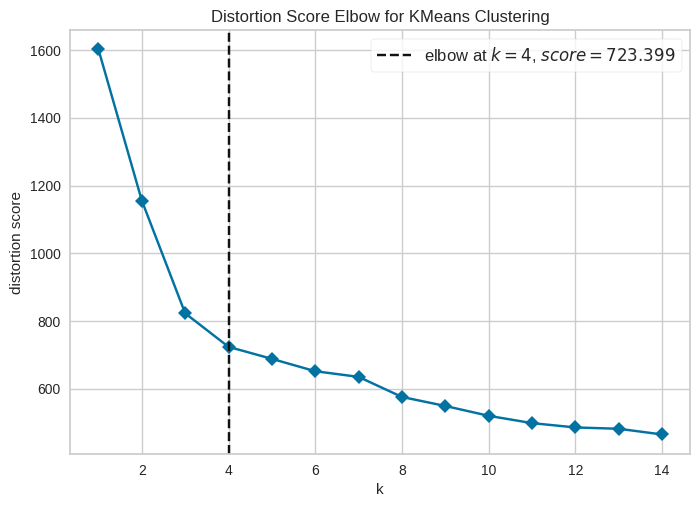

In [51]:
# elbow method to find out the best k
from yellowbrick.cluster import KElbowVisualizer
SSE = {}
for k in range(1,15):
  km = KMeans(n_clusters=k, init='k-means++', random_state=47)#, max_iter = 1000)
  km = km.fit(wine_clustering)
  SSE[k] = km.inertia_

# plot the graph for SSE and number of clusters
visualizer = KElbowVisualizer(km, k=(1,15), metric='distortion', timings=False)
visualizer.fit(wine_clustering)
visualizer.poof()
plt.show()

We find that 5 is the ideal number of clusters.

In [32]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
kmeans.fit(wine_clustering)

KMeans(n_clusters=5)

In [33]:
wine_df['cluster'] = kmeans.labels_

In [34]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,4


In [35]:
wine_clusters = wine_df.groupby('cluster').mean().round(2)
wine_clusters

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
cluster,,,,,,,,,,,,,
0,13.16,3.39,2.44,21.52,99.31,1.67,0.80,0.45,1.16,7.38,0.68,1.69,627.08
1,13.80,1.94,2.44,16.81,106.09,2.86,3.02,0.29,1.91,5.66,1.06,3.17,1144.30
2,12.49,1.49,2.04,18.15,95.54,2.10,1.85,0.35,1.47,3.36,1.07,2.60,559.57
3,12.29,3.29,2.29,20.51,92.61,2.57,2.43,0.34,1.89,2.82,0.92,3.11,456.56
4,12.11,1.62,2.60,22.83,97.70,2.35,2.24,0.39,1.67,3.12,1.13,2.85,576.17


<Axes: xlabel='cluster', ylabel='alcohol'>

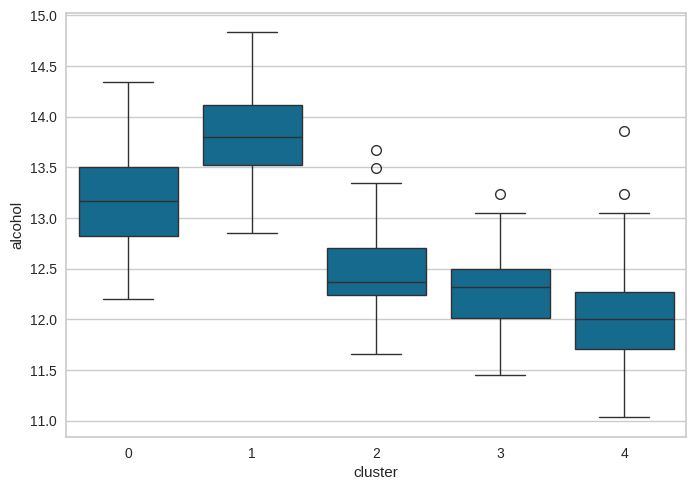

In [40]:
sns.boxplot(y='alcohol', x='cluster', data=wine_df)

we can see here that cluster 0 is medium alcohol, cluster 1 is high alcohol and other clusters are low alcohol.

<Axes: xlabel='cluster', ylabel='malic_acid'>

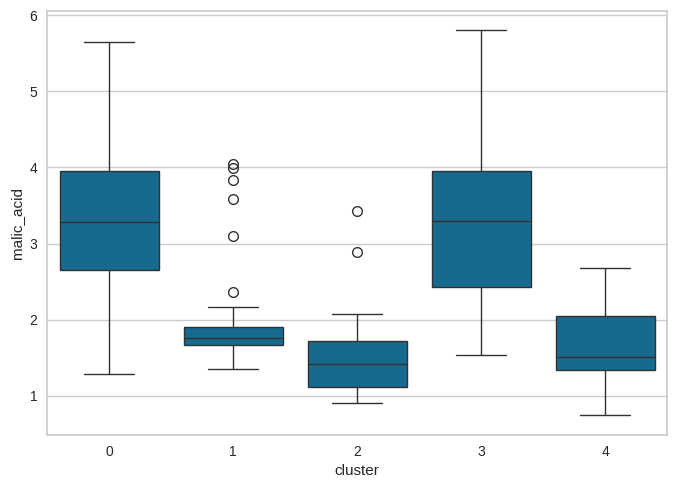

In [41]:
sns.boxplot(y='malic_acid', x='cluster', data=wine_df)

we can see that cluster 0 and 3 have malic acid ranging from low to high, while other clusters are low on malic acid. Malic acid is reduced by Malo-lactic fermentation in wine.

<Axes: xlabel='cluster', ylabel='ash'>

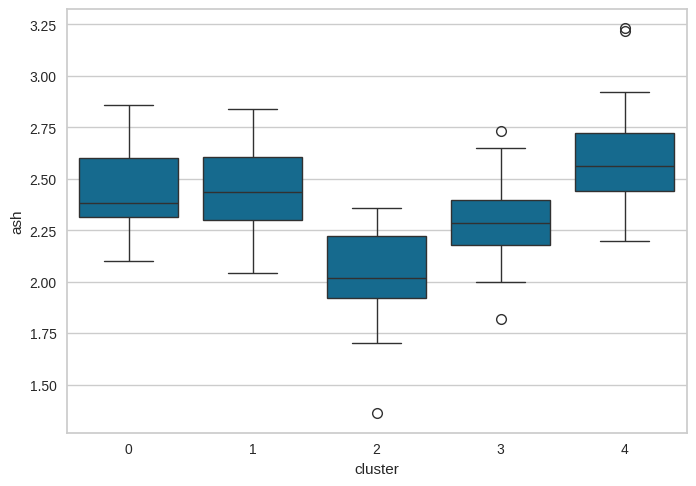

In [42]:
sns.boxplot(y='ash', x='cluster', data=wine_df)

nothing much insightful here.

<Axes: xlabel='cluster', ylabel='alcalinity_of_ash'>

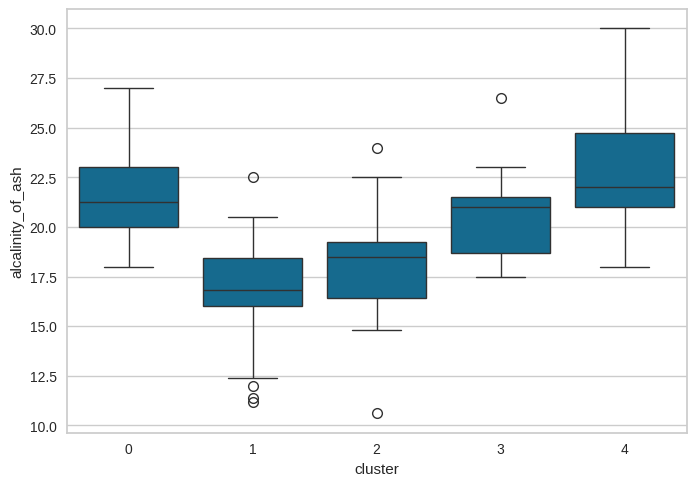

In [43]:
sns.boxplot(y='alcalinity_of_ash', x='cluster', data=wine_df)

this comparision is not insightful at all.

<Axes: xlabel='cluster', ylabel='total_phenols'>

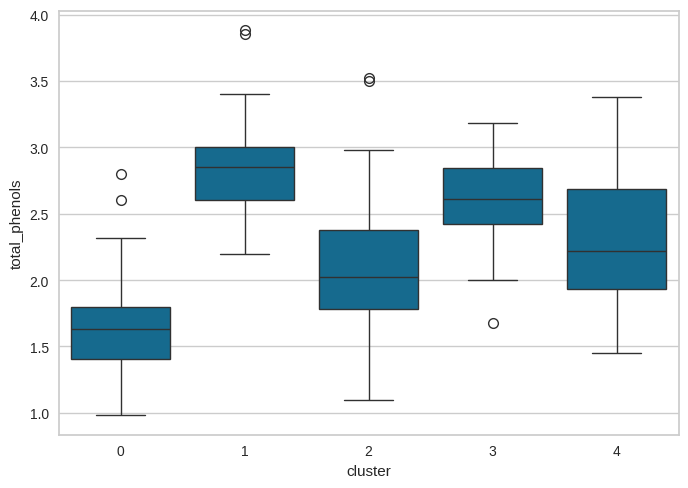

In [44]:
sns.boxplot(y='total_phenols', x='cluster', data=wine_df)

cluster 0 has the lowest phenolic content. cluster 2 can have phenolic content ranging from low to high(basically a style where phenolic content is not important). cluster 4 has medium phenolic content. cluster 1 and 3 have higher phenolic content.

<Axes: xlabel='cluster', ylabel='od280/od315_of_diluted_wines'>

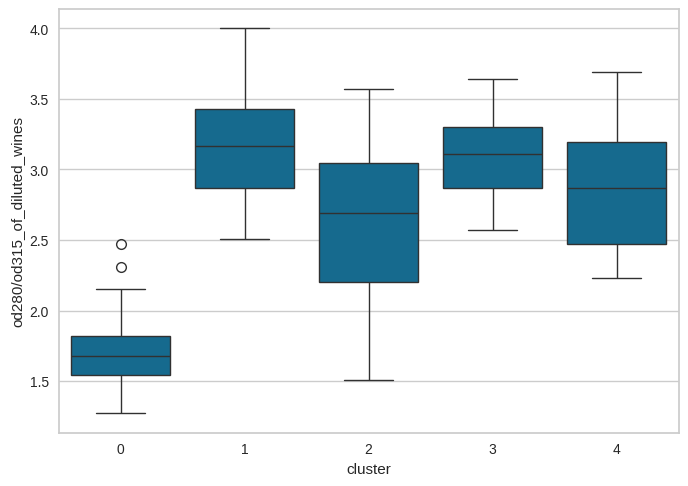

In [46]:
sns.boxplot(y='od280/od315_of_diluted_wines', x='cluster', data=wine_df)

For a red wine, od280/od315_of_diluted_wines talks about the ratio of unoxidised phenols to oxidised phenols. It basically talks about the age of wine. We can conclude that cluster 0 is old wine, cluster 2 contains wines of varied age and other clusters contain young wines.

<Axes: xlabel='total_phenols', ylabel='od280/od315_of_diluted_wines'>

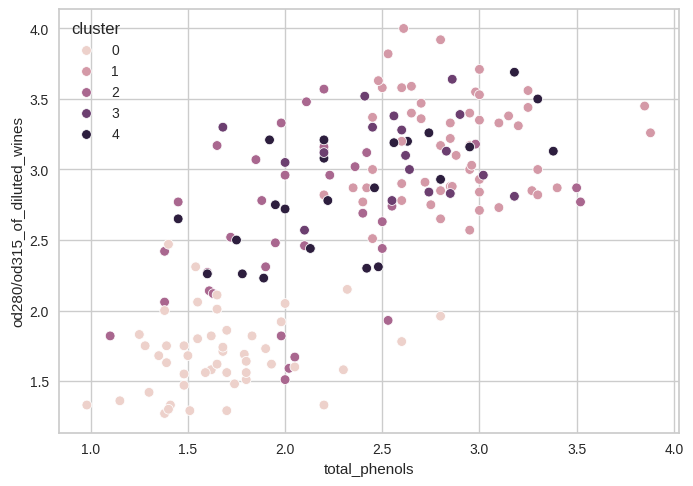

In [47]:
sns.scatterplot(x='total_phenols', y='od280/od315_of_diluted_wines', hue='cluster', data=wine_df)

<Axes: xlabel='cluster', ylabel='hue'>

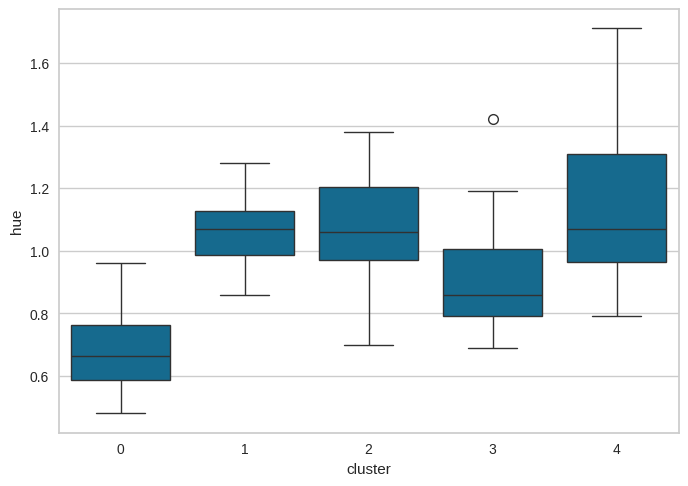

In [48]:
sns.boxplot(y='hue', x='cluster', data=wine_df)

The hue comparision doesn't turn out to be insightful.

<Axes: xlabel='cluster', ylabel='color_intensity'>

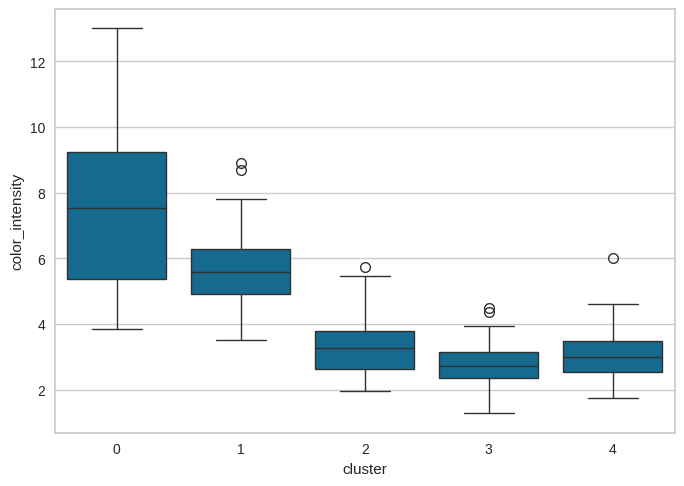

In [49]:
sns.boxplot(y='color_intensity', x='cluster', data=wine_df)

cluster 0 has intense color. cluster 1 is medium in color. All the other clusters are light in color.

<Axes: xlabel='hue', ylabel='color_intensity'>

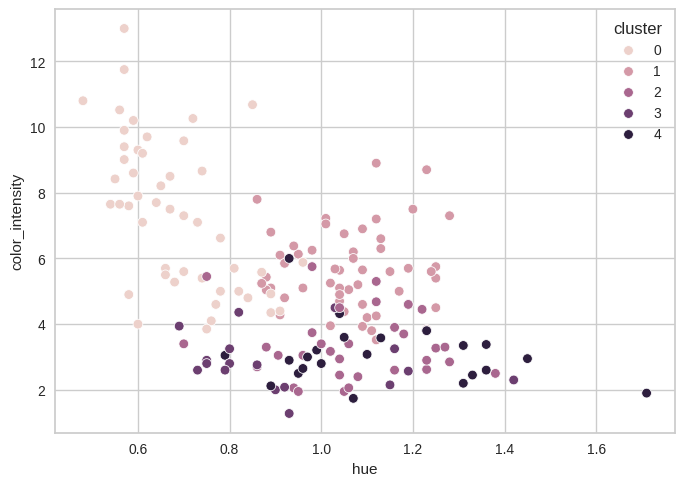

In [45]:
sns.scatterplot(x='hue', y='color_intensity', hue='cluster', data=wine_df)

<Axes: xlabel='cluster', ylabel='proline'>

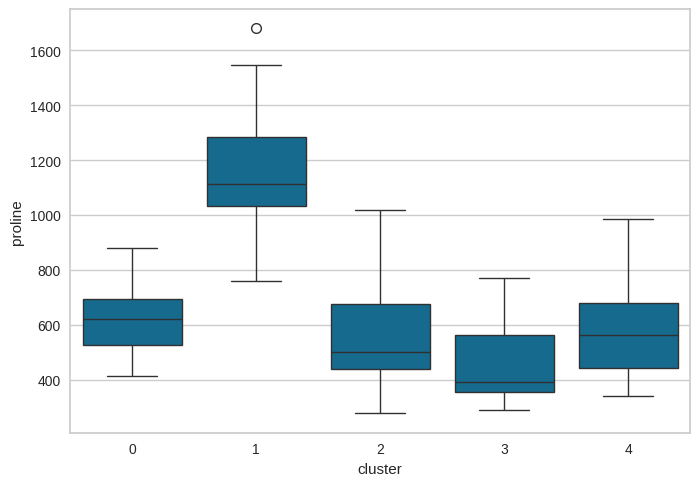

In [50]:
sns.boxplot(y='proline', x='cluster', data=wine_df)

cluster 1 has high proline levels while all other clusters are low in proline.

In [36]:
from sklearn.metrics import silhouette_score

silhouette_score(wine_df[features], wine_df['cluster'])

np.float64(0.09936697612316919)

After analyzing the clusters formed, the clusters can be described as:

- cluster 0: **mature red wines** with deep red color where a good of phenols are already oxidised. They are complex in taste. They have medium alcohol content.
- cluster 1: **Rich wines**, with medium color. They have high phenolic content. They have also gone through malo-lactic fermentation. They also have high proline content that compliments the rich butteryness with savouryness. They also have high alcohol content to make it a fuller experience.
- cluster 2: **balanced wines** with light color. They are high in phenolic content. They have gone through malo-lactic fermentation results in buttery taste and a softer palate. This cluster contains wines of various ages from young to old. They have low alcohol content.
- cluster 3: **astringent wines** with light color. They can have malic acid from low to high. They have high phenolic content. They have low alcohol content. They are young.
- cluster 4: **silky wines** with light color. They have medium phenolic content. They undergo rigorus malo-lactic fermentation. They have low alcohol content. They are young in age.

- **The above are the wine segments that should be targeted with products.**
- **Also while producing wine for particular segment, we should use names that convey the theme, e.g.: for rich wines, the wine blend can be named caesar.**
- **The winery can suggest wines to customers through a designed questionnaire which determines what kind of wines will be suited to customers. This will increase customer acquisation and customer retention. This will help in building a loyal customer base.**